Tesla is an amAmericanlectric vehicle company whose aim is to accelerate the world’s transition towards sustainable energy. A few days back the rise in the stock prices of Tesla made Elon Musk the richest person in the world. 

Predicting stock prices is a great use case of machine learning, so in this file, we will perform Tesla Stock Price Prediction with Machine Learning.

### Tesla Stock Price Prediction

Predicting Stock prices is a great use case of machine learning both for financial and time series analysis. Tesla has been in the eyes of the world for a long time now as governments of so many countries all over the world are supporting the vision of Tesla. So in this file, we will take you through on how to use the [Facebook Prophet model](https://thecleverprogrammer.com/2020/12/14/facebook-prophet-model-with-python/) for the task of stock price prediction of Tesla.

The dataset that we will be using here has been downloaded from [yahoo finance](https://in.finance.yahoo.com/). To download this dataset simply visit yahoo finance and search for TSLA. You will see a dashboard as shown in the image below:

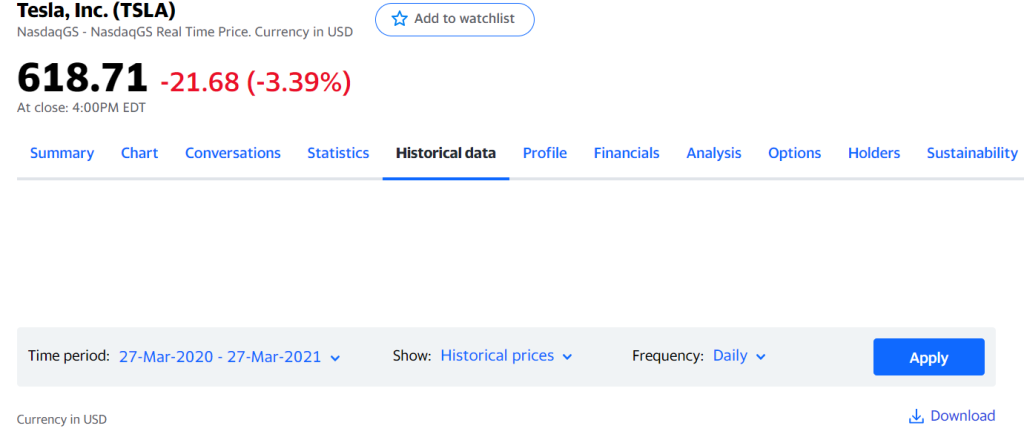

Here we have to click on the historical prices and then click on download. The dataset will be downloaded as `TSLA.csv`.

In [1]:
# !pip install fbprophet

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-29,416.000000,428.500000,411.600006,419.070007,419.070007,50219300
1,2020-09-30,421.320007,433.929993,420.470001,429.010010,429.010010,48145600
2,2020-10-01,440.760010,448.880005,434.420013,448.160004,448.160004,50741500
3,2020-10-02,421.390015,439.130005,415.000000,415.089996,415.089996,71430000
4,2020-10-05,423.350006,433.640015,419.329987,425.679993,425.679993,44722800


Before moving forward let’s visualize the `Close` column in the dataset which represents close prices of each day:

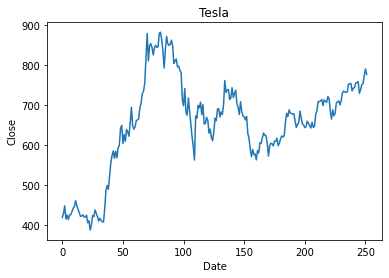

In [4]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

We only need two columns from this dataset (`Date` and `Close`), so let’s create a new DataFrame with only these two columns:

In [5]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

As we are using the **Facebook prophet model** here for predicting the stock prices of Tesla so we need to rename the columns:

In [6]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

We have prepared the dataset for the Facebook prophet model, now let’s predict the stock prices of Tesla:

In [7]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-09-24,1224.009177,498.364074,1885.782009
613,2022-09-25,1225.220074,496.777832,1915.457744
614,2022-09-26,1191.633563,465.532935,1881.478514
615,2022-09-27,1198.419468,464.948379,1885.625302
616,2022-09-28,1198.039290,456.200802,1894.385329


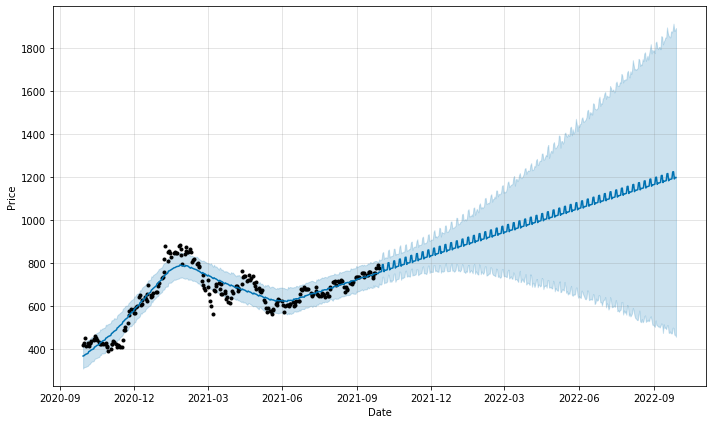

In [8]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

### Conclusion
It seems like Tesla’s stock prices will increase in the coming future. 